### This is jupyter notebook

### 图像操作

In [1]:
print('opencv')

opencv


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread('./target.png')

In [3]:
img[:3,:1,:]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#将图像显示包装到一个方法中进行调用,path为图像路径，name为名字
def cv_show(name,img):
    cv.imshow(name,img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [ ]:
cv_show('target',img)

In [ ]:
img.shape #获取图像的属性(h,w,c)，3表示为彩色图（RBG，在opencv中为BGR格式）

(969, 1020, 3)

In [ ]:
img=cv.imread('./target.png',cv.IMREAD_GRAYSCALE) #灰度图读取
img

array([[167, 167, 170, ..., 175, 179, 179],
       [169, 168, 170, ..., 175, 174, 175],
       [169, 167, 169, ..., 176, 176, 176],
       ...,
       [ 53,  56,  53, ..., 103, 101,  95],
       [ 50,  46,  46, ..., 112,  96,  90],
       [225, 225, 227, ..., 217, 217, 218]], dtype=uint8)

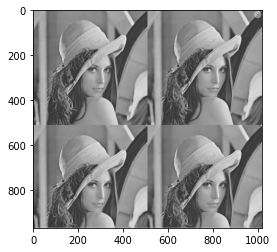

In [ ]:
import matplotlib.pyplot as plt
cv_show('gray',img) #灰度图展示
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [ ]:
cv.imwrite('./myimg.png',img) #图像保存

True

In [ ]:
type(img) #图片数据格式

numpy.ndarray

In [ ]:
img.size #显示像素点个数

988380

In [ ]:
img.dtype #图片数据类型

dtype('uint8')

#### 图片截取

In [ ]:
import cv2 as cv
img = cv.imread('./target.png')
person = img[:100,:10] #h为100，w为10
cv_show('p',person)

In [ ]:
img[:10,:1]

array([[[126, 136, 223]],

       [[128, 138, 225]],

       [[128, 138, 225]],

       [[123, 137, 225]],

       [[119, 135, 224]],

       [[116, 134, 225]],

       [[114, 133, 224]],

       [[109, 132, 224]],

       [[109, 132, 224]],

       [[109, 132, 224]]], dtype=uint8)

In [ ]:
b, g, r = cv.split(img) #拆分图片

In [ ]:
cv_show('b',b)

In [ ]:
b.shape

(969, 1020)

In [ ]:
img=cv.merge((b,g,r)) #合并图片
img.shape

NameError: name 'cv' is not defined

#### 边界填充

In [ ]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)
replicate = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_REPLICATE) #复制法填充，直接复制边缘像素点填充
reflect = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_REFLECT) #反射法填充
reflect101 = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_REFLECT_101) #反射法填充
wrap = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_WRAP) #外包装法填充
constant = cv.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv.BORDER_CONSTANT,0) #常量法填充

NameError: name 'cv' is not defined

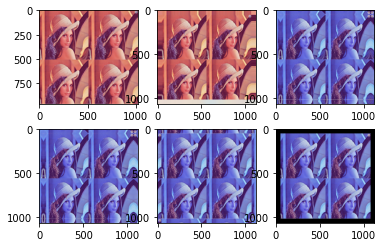

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
img=cv.imread('./target.png')
b,g,r=cv.split(img)
img =cv.merge((r,g,b))
# img=cv.cvtColor(img,cv.COLOR_BGR2RGB) # 改变图片颜色通道
plt.subplot(231), plt.imshow(img,cmap='gray')
plt.subplot(232), plt.imshow(cv.copyMakeBorder(img,50,50,50,50,borderType=cv.BORDER_REPLICATE),'gray')
plt.subplot(233), plt.imshow(reflect,'gray')
plt.subplot(234), plt.imshow(reflect101,'gray')
plt.subplot(235), plt.imshow(wrap,'gray')
plt.subplot(236), plt.imshow(constant,'gray')
plt.show()

#### 图像阈值操作

**ret, dst = cv.threshold(src,thresh,maxval,type)**(通常情况下thresh取127，maxval取255)
* src：输入图，只能输入单通道图像，通常来说为灰度图
* dst：输出图
* thresh：阈值
* maxval：当像素值超过了阈值（小于阈值，根据type来决定），所赋予的值
* type：二值化操作的类型包含5类型:    
    1. cv2.THRESH_BINARY 超过阈值部分取maxval，否则取0
    2. cv2.THRESH_BINARY_INV THRESH_BINARY的反转
    3. cv2.THRESH_TRUNC 大于阈值部分设为阈值，否则不变
    4. cv2.THRESH_TOZERO 大于阈值部分不变，否则设为0
    5. cv2.THRESH_TOZERO_INV THRESH_TOZERO的反转

#### 图像处理

### 视频操作

In [ ]:
import cv2 as cv
vc = cv.VideoCapture('D:/Workspace/data/test.mp4')

In [ ]:
# 判读视频是否能够打开
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False

In [ ]:
while True:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret ==True:
        # video = cv.cvtColor(frame, cv.COLOR_BGR2BGRA) #视频颜色修改
        video = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        cv.imshow('car',video)
        if cv.waitKey(1) & 0xFF == 27:
            break
vc.release()
cv.destroyAllWindows()

#### 画图

In [1]:
import numpy as np
import cv2 as cv
# 画线
# 创建一个黑色的图像
img = np.zeros((512,512,3),np.uint8)
# 画一条5px宽的蓝色对角线(左上角、右上角坐标)
cv.line(img,(10,10),(500,500),(0,0,255),2)
# 画矩阵(左上角、右上角坐标)
cv.rectangle(img,(384,10),(492,118),(255,0,0),2)
# 画圆(圆心坐标、半径)
cv.circle(img,(438,64),54,(0,255,0))
# 椭圆
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()